In [ ]:
import codecs
import numpy as np
import pandas as pd
import re
import tensorflow as tf
import nltk
import string
from itertools import chain
print(tf.__version__)

2.4.1


#Подготовка данных

In [ ]:
data_fpath = '/content/movie_conversations.txt'
max_sentences = 10000

LcharacterID_f=[]
LcharacterID_s=[]
LmovieID=[]
Lorder=[]
f = open(data_fpath)
for line in f:
  uni_str=line.encode("windows-1251").decode("utf-8")
  characterID_f,characterID_s, movieID, order= uni_str.split(' +++$+++ ')
  LcharacterID_f.append(characterID_f)
  LcharacterID_s.append(characterID_s)
  LmovieID.append(movieID)
  ge= re.sub("']\n",'',order)
  ge= re.sub("\['",'',ge)
  ge= re.sub("'",'',ge)
  ge= re.sub(' ','',ge)
  ge=re.split(',',ge)   
  Lorder.append(ge)      

In [ ]:
np_movie_conversations=np.asarray((LcharacterID_f,LcharacterID_s,LmovieID,Lorder)).T

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
df_movie_conversations=pd.DataFrame(data=np_movie_conversations,
          index=np.array(range(len(np_movie_conversations))),
          columns=['characterID_f','characterID_s', 'movieID','order'] )

In [ ]:
df_movie_conversations.head()

,characterID_f,characterID_s,movieID,order
0,u0,u2,m0,"[L194, L195, L196, L197]"
1,u0,u2,m0,"[L198, L199]"
2,u0,u2,m0,"[L200, L201, L202, L203]"
3,u0,u2,m0,"[L204, L205, L206]"
4,u0,u2,m0,"[L207, L208]"


In [ ]:
sum_char=df_movie_conversations.groupby(['characterID_f','characterID_s']).count().reset_index() 

In [ ]:
df_movie_conversations['dia_len']=df_movie_conversations.order.apply(len)
df_movie_conversations.head()

,characterID_f,characterID_s,movieID,order,dia_len
0,u0,u2,m0,"[L194, L195, L196, L197]",4
1,u0,u2,m0,"[L198, L199]",2
2,u0,u2,m0,"[L200, L201, L202, L203]",4
3,u0,u2,m0,"[L204, L205, L206]",3
4,u0,u2,m0,"[L207, L208]",2


In [ ]:
dia_2=df_movie_conversations[df_movie_conversations['dia_len']==2][['characterID_f','characterID_s','order']]
dia_2.head()

,characterID_f,characterID_s,order
1,u0,u2,"[L198, L199]"
4,u0,u2,"[L207, L208]"
6,u0,u2,"[L276, L277]"
7,u0,u2,"[L280, L281]"
8,u0,u2,"[L363, L364]"


In [ ]:
LQA=dia_2.order.values
LA=[]
LQ=[]
for di in LQA:
  LQ.append(di[0])
  LA.append(di[1])

In [ ]:
np_dia=np.asarray((LQ,LA)).T

In [ ]:
df_dia=pd.DataFrame(data=np_dia,
          index=np.array(range(len(np_dia))),
          columns=['Q','A'] )
df_dia

,Q,A
0,L198,L199
1,L207,L208
2,L276,L277
3,L280,L281
4,L363,L364
...,...,...
38086,L666460,L666461
38087,L666485,L666486
38088,L666546,L666547
38089,L666575,L666576


In [ ]:
data_fpath = '/content/movie_lines_3.txt'
max_sentences = 10000
LlineID=[]
LcharacterID=[]
LmovieID=[]
Lcharacter_name=[]
Ltext_of_the_utterance=[]
#lines = codecs.open(data_fpath, 'r', encoding='ANSI').readlines()#[:max_sentences]
i=0
f = open(data_fpath)
#try:
for line in f:
  uni_str=line.encode("windows-1251").decode("utf-8")
  #.decode("utf-8").encode("windows-1251").decode("utf-8")
  lineID,characterID,movieID,character_name,text_of_the_utterance= uni_str.split(' +++$+++ ')   
  #print(i)
  i=i+1
  LlineID.append(lineID)
  LcharacterID.append(characterID)
  LmovieID.append(movieID)
  Lcharacter_name.append(character_name)
  pos= re.sub("\n",'',text_of_the_utterance)    
  Ltext_of_the_utterance.append(pos)


In [ ]:
np_movie_line=np.asarray((LlineID,LcharacterID,Ltext_of_the_utterance)).T
df_movie_line=pd.DataFrame(data=np_movie_line,
          index=np.array(range(len(np_movie_line))),
          columns=['LlineID','LcharacterID','Ltext_of_the_utterance'])
df_movieLlineID_line.head()

,LlineID,LcharacterID,Ltext_of_the_utterance
0,L1045,u0,They do not!
1,L1044,u2,They do to!
2,L985,u0,I hope so.
3,L984,u2,She okay?
4,L925,u0,Let's go.


In [ ]:
df_diaA=df_dia.merge(df_movie_line,left_on='A', right_on='LlineID')
df_diaAQ=df_diaA.merge(df_movie_line,left_on='Q', right_on='LlineID')
df_diaAQ

,Q,A,LlineID_x,LcharacterID_x,Ltext_of_the_utterance_x,LlineID_y,LcharacterID_y,Ltext_of_the_utterance_y
0,L198,L199,L199,u2,Forget it.,L198,u0,You're asking me out. That's so cute. What's ...
1,L207,L208,L208,u2,Let me see what I can do.,L207,u0,"Gosh, if only we could find Kat a boyfriend..."
2,L276,L277,L277,u2,"Well, there's someone I think might be --",L276,u0,How is our little Find the Wench A Date plan p...
3,L280,L281,L281,u0,Where?,L280,u2,There.
4,L363,L364,L364,u0,I counted on you to help my cause. You and tha...,L363,u2,You got something on your mind?
...,...,...,...,...,...,...,...,...
38086,L666460,L666461,L666461,u9027,Thank you.,L666460,u9029,The only reports of enemy activity have come f...
38087,L666485,L666486,L666486,u9029,A large party of Zulus have been sighted in th...,L666485,u9027,Yes?
38088,L666546,L666547,L666547,u9029,"Certainly, Sin",L666546,u9027,"Splendid site, Crealock, splendil I want to es..."
38089,L666575,L666576,L666576,u9031,Keep steady. You're the best shots of the Twen...,L666575,u9028,Choose your targets men. That's right Watch th...


In [ ]:
df_diaAQ.columns=['LQ','LA','Line_A','LcharacterID_A','Ans','Line_B','LcharacterID_Q','Qwe']
df_diaAQ

,LQ,LA,Line_A,LcharacterID_A,Ans,Line_B,LcharacterID_Q,Qwe
0,L198,L199,L199,u2,Forget it.,L198,u0,You're asking me out. That's so cute. What's ...
1,L207,L208,L208,u2,Let me see what I can do.,L207,u0,"Gosh, if only we could find Kat a boyfriend..."
2,L276,L277,L277,u2,"Well, there's someone I think might be --",L276,u0,How is our little Find the Wench A Date plan p...
3,L280,L281,L281,u0,Where?,L280,u2,There.
4,L363,L364,L364,u0,I counted on you to help my cause. You and tha...,L363,u2,You got something on your mind?
...,...,...,...,...,...,...,...,...
38086,L666460,L666461,L666461,u9027,Thank you.,L666460,u9029,The only reports of enemy activity have come f...
38087,L666485,L666486,L666486,u9029,A large party of Zulus have been sighted in th...,L666485,u9027,Yes?
38088,L666546,L666547,L666547,u9029,"Certainly, Sin",L666546,u9027,"Splendid site, Crealock, splendil I want to es..."
38089,L666575,L666576,L666576,u9031,Keep steady. You're the best shots of the Twen...,L666575,u9028,Choose your targets men. That's right Watch th...


In [ ]:
df_diaAQ_work=df_diaAQ[['LQ','LA','LcharacterID_A','Ans','LcharacterID_Q','Qwe']]


In [ ]:
df_diaAQ_work.to_csv('work_data.csv')

In [ ]:
work_data=pd.read_csv('/content/work_data.csv')


In [ ]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38091 entries, 0 to 38090
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      38091 non-null  int64 
 1   LQ              38091 non-null  object
 2   LA              38091 non-null  object
 3   LcharacterID_A  38091 non-null  object
 4   Ans             38062 non-null  object
 5   LcharacterID_Q  38091 non-null  object
 6   Qwe             38059 non-null  object
dtypes: int64(1), object(6)
memory usage: 2.0+ MB


In [ ]:
stop_words = [
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
    'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',
    'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'shold',
    "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't",
    'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
    'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't",
    'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [ ]:
def tokenize_text(raw_text: str):
    """Функция для токенизации текста    
    :param raw_text: исходная текстовая строка
    """
    tokenized_str = nltk.word_tokenize(raw_text)
#    tokens = [i.lower() for i in tokenized_str if ( i not in string.punctuation )]
#    filtered_tokens = [i for i in tokens if ( i not in stop_words )]
#    return filtered_tokens
    return tokenized_str

In [ ]:
nltk.download('punkt', download_dir='.')

[nltk_data] Downloading package punkt to ....
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
work_data['token_A']=(work_data['Ans']).apply(str).apply(tokenize_text)

In [ ]:
work_data['token_A_len']=(work_data['token_A']).apply(len)


In [ ]:
work_data['token_Q']=(work_data['Qwe']).apply(str).apply(tokenize_text)
work_data['token_Q_len']=(work_data['token_Q']).apply(len)

In [ ]:
work_data.head()

,Unnamed: 0,LQ,LA,LcharacterID_A,Ans,LcharacterID_Q,Qwe,token_A,token_A_len,token_Q,token_Q_len
0,0,L198,L199,u2,Forget it.,u0,You're asking me out. That's so cute. What's ...,"[Forget, it, .]",3,"[You, 're, asking, me, out, ., That, 's, so, c...",17
1,1,L207,L208,u2,Let me see what I can do.,u0,"Gosh, if only we could find Kat a boyfriend...","[Let, me, see, what, I, can, do, .]",8,"[Gosh, ,, if, only, we, could, find, Kat, a, b...",11
2,2,L276,L277,u2,"Well, there's someone I think might be --",u0,How is our little Find the Wench A Date plan p...,"[Well, ,, there, 's, someone, I, think, might,...",10,"[How, is, our, little, Find, the, Wench, A, Da...",12
3,3,L280,L281,u0,Where?,u2,There.,"[Where, ?]",2,"[There, .]",2
4,4,L363,L364,u0,I counted on you to help my cause. You and tha...,u2,You got something on your mind?,"[I, counted, on, you, to, help, my, cause, ., ...",26,"[You, got, something, on, your, mind, ?]",7


In [ ]:
work_chat=work_data[(work_data['token_A_len']<16)&(work_data['token_Q_len']<16)]


## Массив данных для обучения чат бота

In [ ]:
work_chat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21659 entries, 1 to 38090
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      21659 non-null  int64 
 1   LQ              21659 non-null  object
 2   LA              21659 non-null  object
 3   LcharacterID_A  21659 non-null  object
 4   Ans             21633 non-null  object
 5   LcharacterID_Q  21659 non-null  object
 6   Qwe             21629 non-null  object
 7   token_A         21659 non-null  object
 8   token_A_len     21659 non-null  int64 
 9   token_Q         21659 non-null  object
 10  token_Q_len     21659 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.0+ MB


In [ ]:
input_texts=work_chat['Qwe'].apply(str).sum()
#input_texts1=re.sub("\\'","",input_texts)

In [ ]:
input_texts

In [ ]:
target_texts=work_chat['Ans'].apply(str).values.sum()

In [ ]:
def prepare_vocab(texts):
    vocab = sorted(set(''.join(texts)))
    vocab.append('<START>')
    vocab.append('<END>')
    vocab_size = len(vocab)
    char2idx = {u:i for i, u in enumerate(vocab)}
    idx2char = np.array(vocab)
    return vocab_size, char2idx, idx2char

In [ ]:
INPUT_VOCAB_SIZE, input_char2idx, input_idx2char = prepare_vocab(input_texts)
TARGET_VOCAB_SIZE, target_char2idx, target_idx2char = prepare_vocab(target_texts)

In [ ]:
input_texts_data=work_chat['Qwe'].apply(str).values
#target_texts_data=work_chat['Ans'].apply(str)
target_texts_data=work_chat['Ans'].apply(str).values

In [ ]:
input_texts_as_int = [[input_char2idx[c] for c in text] for text in input_texts_data]
target_texts_as_int = [[target_char2idx[c] for c in text] for text in target_texts_data]

encoder_input_seqs = [np.array(text) for text in input_texts_as_int]
decoder_input_seqs = []
decoder_target_seqs = []
for target_text in target_texts_as_int:
    decoder_input_seqs.append(np.array([target_char2idx['<START>']] + target_text))
    decoder_target_seqs.append(np.array(target_text + [target_char2idx['<END>']]))

In [ ]:
input_texts_data

array(['Gosh, if only we could find Kat a boyfriend...',
       'How is our little Find the Wench A Date plan progressing?',
       'There.', ..., 'Are you dictating the strategy of this war, Sir?',
       'Splendid site, Crealock, splendil I want to establish Camp here immediately.',
       "Colonel Durnford... William Vereker. I hear you 've been seeking Officers?"],
      dtype=object)

In [ ]:
max_enc_seq_length = max([len(seq) for seq in encoder_input_seqs])
max_dec_seq_length = max([len(seq) for seq in decoder_input_seqs])

encoder_input_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    encoder_input_seqs,
    value=input_char2idx[' '],
    padding='post',
    maxlen=max_enc_seq_length)

decoder_input_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    decoder_input_seqs,
    value=target_char2idx[' '],
    padding='post',
    maxlen=max_dec_seq_length)

decoder_target_seqs = tf.keras.preprocessing.sequence.pad_sequences(
    decoder_target_seqs,
    value=target_char2idx[' '],
    padding='post',
    maxlen=max_dec_seq_length)

In [ ]:
H_SIZE = 256 # Размерность скрытого состояния LSTM
EMB_SIZE = 256 # размерность эмбеддингов (и для входных и для выходных цепочек)

class Encoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(INPUT_VOCAB_SIZE, EMB_SIZE)
        self.lstm = tf.keras.layers.LSTM(H_SIZE, return_sequences=False, return_state=True)
        
    def call(self, x):
        out = self.embed(x)
        _, h, c = self.lstm(out)
        state = (h, c)
        return state

class Decoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embed = tf.keras.layers.Embedding(TARGET_VOCAB_SIZE, EMB_SIZE)
        self.lstm = tf.keras.layers.LSTM(H_SIZE, return_sequences=True, return_state=True)
        self.fc = tf.keras.layers.Dense(TARGET_VOCAB_SIZE, activation='softmax')
        
    def call(self, x, init_state):
        out = self.embed(x)
        out, h, c = self.lstm(out, initial_state=init_state)
        out = self.fc(out)
        state = (h, c)
        return out, state

encoder_model = Encoder()
decoder_model = Decoder()

encoder_inputs = tf.keras.layers.Input(shape=(None,))
decoder_inputs = tf.keras.layers.Input(shape=(None,))

enc_state = encoder_model(encoder_inputs)
decoder_outputs, _ = decoder_model(decoder_inputs, enc_state)

seq2seq = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
BATCH_SIZE = 64
EPOCHS = 100

loss = tf.losses.SparseCategoricalCrossentropy()
seq2seq.compile(optimizer='rmsprop', loss=loss, metrics=['accuracy'])
seq2seq.fit([encoder_input_seqs, decoder_input_seqs], decoder_target_seqs,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS)

Epoch 1/100
339/339 [==============================] - 11s 26ms/step - loss: 1.1221 - accuracy: 0.7469
Epoch 2/100
339/339 [==============================] - 9s 26ms/step - loss: 0.6204 - accuracy: 0.8213
Epoch 3/100
339/339 [==============================] - 9s 26ms/step - loss: 0.5530 - accuracy: 0.8382
Epoch 4/100
339/339 [==============================] - 9s 26ms/step - loss: 0.5151 - accuracy: 0.8480
Epoch 5/100
339/339 [==============================] - 9s 26ms/step - loss: 0.4933 - accuracy: 0.8538
Epoch 6/100
339/339 [==============================] - 9s 25ms/step - loss: 0.4785 - accuracy: 0.8577
Epoch 7/100
339/339 [==============================] - 9s 25ms/step - loss: 0.4637 - accuracy: 0.8612
Epoch 8/100
339/339 [==============================] - 9s 25ms/step - loss: 0.4526 - accuracy: 0.8641
Epoch 9/100
339/339 [==============================] - 9s 25ms/step - loss: 0.4456 - accuracy: 0.8660
Epoch 10/100
339/339 [==============================] - 9s 25ms/step - loss: 0.43

In [ ]:
def seq2seq_inference(input_seq):
    state = encoder_model(input_seq)

    target_seq = np.array([[target_char2idx['<START>']]])

    decoded_sentence = ''
    while True:
        output_tokens, state = decoder_model(target_seq, state)

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = target_idx2char[sampled_token_index]
        decoded_sentence += sampled_char

        if (sampled_char == '<END>' or
           len(decoded_sentence) > max_dec_seq_length):
            break

        target_seq = np.array([[sampled_token_index]])

    return decoded_sentence

In [ ]:
for seq_index in range(250, 290):
    input_seq = encoder_input_seqs[seq_index: seq_index + 1]
    decoded_sentence = seq2seq_inference(input_seq)
    print('-')
    print('Input sentence:', input_texts_data[seq_index])
    print('Result sentence:', decoded_sentence)
    print('Target sentence:', target_texts_data[seq_index])

-
Input sentence: Have a pleasant evening.  Will you have tea, Mister Welles?
Result sentence: I have to go to the way you will.                                                             
Target sentence: Thank you.
-
Input sentence: He's odd.
Result sentence: I don't know.<END>
Target sentence: He's a lawyer.  Please, sit, here...
-
Input sentence: People remember me from the news.  Can you drive me back now?
Result sentence: I don't know.<END>
Target sentence: Of course.
-
Input sentence: Rick...I can't.
Result sentence: I don't know.<END>
Target sentence: Never say can't.  Just do what I do.
-
Input sentence: You alright?
Result sentence: I don't know.<END>
Target sentence: Kristen...
-
Input sentence: I can't go back to sleep again.
Result sentence: I don't know.<END>
Target sentence: I haven't slept much either.  Since Kristen...
-
Input sentence: I love to dream, I just hate ones about my dad.
Result sentence: I don't know.<END>
Target sentence: You could do worse.
-
Input sent

# Вспомогательные вычисления

In [ ]:
sum_lite=sum_char[sum_char['order']>2].sort_values('order',ascending=False)
sum_lite.head()

,characterID_f,characterID_s,movieID,order
609,u1469,u1475,166,166
5184,u5064,u5065,152,152
9377,u8408,u8409,113,113
2219,u2735,u2738,111,111
4357,u4404,u4405,109,109


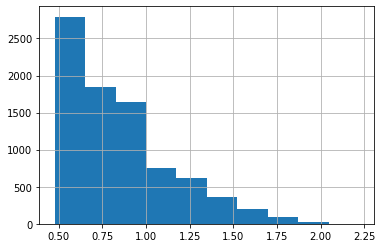

In [ ]:
sum_lite.order.agg(np.log10).hist()

In [ ]:
rel=sum_lite['characterID_f'].values+','+sum_lite['characterID_s'].values
rel_list=[]
for i in range(len(rel)):
  rel_list.append(rel[i].split(',')) 
for i  in range(len(rel_list)-1):
  for m in range(i,len(rel_list)):
    if (rel_list[i][1]==rel_list[m][0]):
      print(rel_list[i],rel_list[m])

In [ ]:
data_fpath = '/content/movie_titles_metadata_utf.txt'
max_sentences = 10000

LmovieID=[]
Lmovie_title=[]
Lmovie_year=[]
LIMDB_rating=[]
Lno_IMDB_votes=[]
Lgenres=[]

#lines = codecs.open(data_fpath, 'r', encoding='ANSI').readlines()#[:max_sentences]
lines = codecs.open(data_fpath, 'r').readlines()#[:max_sentences]
for line in lines:
    movieID, movie_title, movie_year, IMDB_rating,no_IMDB_votes,genres,= line.split(' +++$+++ ')#[:2]
    LmovieID.append(movieID)
    Lmovie_title.append(movie_title)
    Lmovie_year.append(movie_year)
    LIMDB_rating.append(IMDB_rating)
    Lno_IMDB_votes.append(no_IMDB_votes)
    ge= re.sub("']\n",'',genres)
    ge= re.sub("\['",'',ge)
    ge= re.sub("'",'',ge)
    ge=re.split(',',ge)   
    Lgenres.append(ge)         

In [ ]:
np_movie_titles_metadata=np.asarray((LmovieID, Lmovie_title,Lmovie_year,LIMDB_rating,Lno_IMDB_votes,Lgenres)).T


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


array(['m9', 'the atomic submarine', '1959', '4.90', '513',
       list(['sci-fi', ' thriller'])], dtype=object)

In [ ]:
df_movie_titles_metadata.head()

,movieID,movie_title,movie_year,IMDB_rating,no. IMDB_votes,genres
0,m0,10 things i hate about you,1999,6.90,62847,"[comedy, romance]"
1,m1,1492: conquest of paradise,1992,6.20,10421,"[adventure, biography, drama, history]"
2,m2,15 minutes,2001,6.10,25854,"[action, crime, drama, thriller]"
3,m3,2001: a space odyssey,1968,8.40,163227,"[adventure, mystery, sci-fi]"
4,m4,48 hrs.,1982,6.90,22289,"[action, comedy, crime, drama, thriller]"


In [ ]:
Lposition

https://habr.com/ru/post/317732/

https://habr.com/ru/company/meanotek/blog/256987/

In [ ]:
np_movie_titles_metadata=np.asarray((LmovieID, Lmovie_title,Lmovie_year,LIMDB_rating,Lno_IMDB_votes,Lgenres)).T

In [ ]:
df_movie_titles_metadata=pd.DataFrame(data=np_movie_titles_metadata,
          index=np.array(range(len(np_movie_titles_metadata))),
          columns=['movieID', 'movie_title','movie_year', 'IMDB_rating','no. IMDB_votes','genres'] )

In [ ]:
df_movie_characters_metadata=pd.read_table('/content/movie_characters_metadata.txt',sep=' +++$+++ ')

In [ ]:
['characterID','character name','movieID','movie title','gender','position']

In [ ]:
		['movieID', 'movie_title','movie_year', 'IMDB_rating','no. IMDB_votes','genres'] 

In [ ]:
data_fpath = '/content/movie_characters_metadata_utf2.txt'
max_sentences = 10000

LcharacterID=[]
Lcharacter_name=[]
LmovieID=[]
Lmovie_title=[]
Lgender=[]
Lposition=[]
#lines = codecs.open(data_fpath, 'r', encoding='ANSI').readlines()#[:max_sentences]
i=0
f = open(data_fpath)
for line in f:
    characterID,character_name,movieID,movie_title,gender,position= line.split(' +++$+++ ')
    LcharacterID.append(characterID)
    Lcharacter_name.append(character_name)
    LmovieID.append(movieID)
    Lmovie_title.append(movie_title)
    Lgender.append(gender)
    pos= re.sub("\n",'',position)
    Lposition.append(pos)

In [ ]:
for i  in range(len(rel_list)-1):
  for m in range(i,len(rel_list)):
    if (rel_list[i][1]==rel_list[m][0]) and (rel_list[i][0]==rel_list[m][1]):
      print(rel_list[i],rel_list[m])

In [ ]:
sum_char['rel'].values

array(['u0,u11', 'u0,u2', 'u0,u3', ..., 'u998,u1004', 'u998,u1005',
       'u999,u1006'], dtype=object)

In [ ]:
sum_char_h=df_movie_conversations.groupby(['characterID_f']).count().reset_index() 

In [ ]:
sum_char_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5420 entries, 0 to 5419
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   characterID_f  5420 non-null   object
 1   characterID_s  5420 non-null   int64 
 2   movieID        5420 non-null   int64 
 3   order          5420 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 169.5+ KB


In [ ]:
sum_char_w=df_movie_conversations.groupby(['characterID_f','characterID_s']).order.count()

In [ ]:
matrix=sum_char_w.unstack().reset_index()

In [ ]:
matrix.head()

characterID_s,characterID_f,u1001,u1003,u1004,u1005,u1006,u1010,u1011,u1014,u1017,u1018,u1019,u1020,u1021,u1022,u1023,u1025,u1026,u1029,u1031,u1032,u1033,u1034,u1035,u1040,u1041,u1042,u1043,u1045,u1046,u1047,u1048,u1049,u105,u1054,u1060,u1061,u1063,u1064,u1065,...,u939,u940,u941,u944,u955,u956,u957,u958,u959,u96,u961,u962,u963,u964,u966,u967,u968,u969,u97,u970,u973,u974,u977,u979,u98,u980,u981,u982,u985,u986,u987,u988,u989,u99,u990,u991,u993,u994,u997,u998
0,u0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,u1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,u100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u1000,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
matrix.columns

Index(['characterID_f', 'u1001', 'u1003', 'u1004', 'u1005', 'u1006', 'u1010',
       'u1011', 'u1014', 'u1017',
       ...
       'u987', 'u988', 'u989', 'u99', 'u990', 'u991', 'u993', 'u994', 'u997',
       'u998'],
      dtype='object', name='characterID_s', length=5609)

In [ ]:
row_iterator = matrix.iterrows()

#_, last = row_iterator.next()  # take first item from row_iterator
for i, row in row_iterator:
  for m in range(2,len(matrix.columns)):
    col=matrix.columns[6]
    row[col]>1
#    print(last['characterID_f'])
#    last = row